In [70]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  
from sklearn.metrics import plot_roc_curve, auc, roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve

rand_st = 42

%matplotlib inline

In [71]:
titanik = pd.read_csv('train.csv', sep=',')

titanik.head(4)
#titanik.columns

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [72]:
# For EDA you may want to split the original dataframe, and assign X and y later
titanik_train, titanik_validation = train_test_split(titanik, test_size=0.3, random_state= rand_st)

EDA

In [73]:
titanik_train_survived = titanik_train[titanik_train['Survived'] == 1]
titanik_train_survived.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S
801,802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S
581,582,1,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.0,1,1,17421,110.8833,C68,C
334,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.6500,NaN,S


In [74]:
s_av = round(titanik_train_survived['Age'].mean(),2)
print(f'The average age of survived passengers was {s_av}.')

The average age of survived passengers was 27.85.


In [75]:
titanik_train_non_survived = titanik_train[titanik_train['Survived'] == 0]                           
s_n_av = round(titanik_train_non_survived['Age'].mean(),2)
print(f'The average age of drowned passengers was {s_n_av}.')

The average age of drowned passengers was 30.19.


In [76]:
aver_age  = titanik_train['Age'].mean()
titanik_train['Age'].replace(to_replace = np.nan, value = aver_age)

445     4.000000
650    29.256353
172     1.000000
450    36.000000
314    43.000000
         ...    
106    21.000000
270    29.256353
860    41.000000
435    14.000000
102    21.000000
Name: Age, Length: 623, dtype: float64

<Figure size 720x360 with 0 Axes>

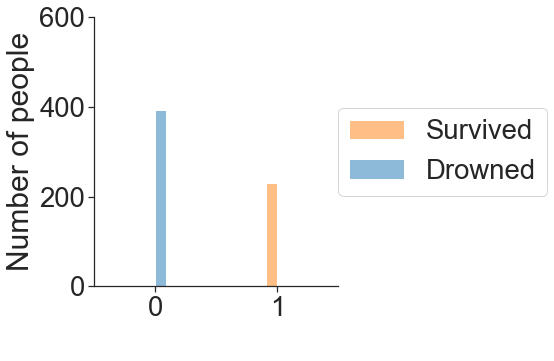

In [77]:
plt.figure(figsize=(10,5))
ax = sns.displot(titanik_train,x="Survived",hue ='Survived',legend = False)

ax.set(xlabel=' ', ylabel='Number of people')
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", font_scale=2.5 )

ax.set(xlim=(-0.5, 1.5), ylim=(0, 600), alpha = 1, frame_on = True)
plt.legend(['Survived','Drowned'], loc='center left', bbox_to_anchor=(1, 0.5),borderaxespad=0)

In [78]:
survived_train_1st_class = titanik_train_survived[titanik_train_survived['Pclass'] == 1].shape[0]/titanik_train[titanik_train['Pclass'] == 1].shape[0]
Class_1 = titanik_train[titanik_train['Pclass'] == 1].shape[0]
surv_1_class = titanik_train_survived[titanik_train_survived['Pclass'] == 1].shape[0]
print(f'The amount of passengers in first class are {Class_1} and from them survived (Survived = 0) the {round(survived_train_1st_class,2)} people.')

The amount of passengers in first class are 139 and from them survived (Survived = 0) the 0.6 people.


In [79]:
titanik_train[titanik_train['Pclass'] == 1].shape[0]
titanik_train_survived[titanik_train_survived['Pclass'] == 1].shape[0]

83

In [80]:
dfg = titanik_train.groupby(['Sex','Pclass'])['Embarked'].count()
dfg

Sex     Pclass
female  1          60
        2          49
        3         103
male    1          78
        2          83
        3         249
Name: Embarked, dtype: int64

[Text(0.5, 0, 'Population')]

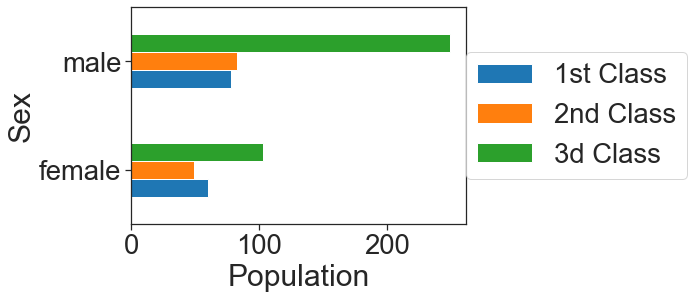

In [81]:
ax = titanik_train.groupby(['Sex','Pclass'])['Embarked'].count().unstack(1).plot.barh()
plt.legend(['1st Class','2nd Class','3d Class'], loc='center left', bbox_to_anchor=(1, 0.5),borderaxespad=0)
ax.set(xlabel='Population')

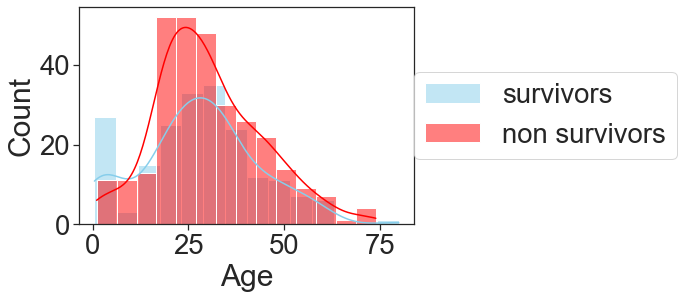

In [82]:
sns.histplot(data=titanik_train_survived, x="Age", color="skyblue", label="survivors", kde=True)
sns.histplot(data=titanik_train_non_survived, x="Age", color="red", label="non survivors", kde=True)

plt.legend() 
ax.set(xlabel='Age', ylabel='People')
plt.legend( loc='center left', bbox_to_anchor=(1, 0.5),borderaxespad=0)
plt.show()

In [83]:
Table_train = titanik_train.groupby(['Survived','Sex','Pclass'])['Survived'].count()
titanik_train1= pd.DataFrame(Table_train, index=pd.Index(['Population'],name = 'Pop'),
                  columns=pd.MultiIndex.from_product([['Yes', 'No'],['Female', 'Male'],['1','2','3']], names=['Survived:', 'Sex:', 'P_class']))
titanik_train1.style

In [84]:
del titanik_train['Ticket']
del titanik_train['Name']
del titanik_train['PassengerId']
del titanik_train['Embarked']
del titanik_train['SibSp']

In [85]:
titanik_train.head(5)

,Survived,Pclass,Sex,Age,Parch,Fare,Cabin
445,1,1,male,4.0,2,81.8583,A34
650,0,3,male,NaN,0,7.8958,NaN
172,1,3,female,1.0,1,11.1333,NaN
450,0,2,male,36.0,2,27.7500,NaN
314,0,2,male,43.0,1,26.2500,NaN


In [86]:
 # I also checked extra features like Class and Age but it did not give better result in the end so i reduced the features.

X_train = titanik_train.iloc[:,1:]
y_train = titanik_train['Survived']
X_validation = titanik_validation.iloc[:,1:]
y_validation = titanik_validation['Survived']
X_train.shape, X_validation.shape, y_train.shape, y_validation.shape


((623, 6), (268, 11), (623,), (268,))

In [87]:
# Treat of data to make possible the use in the model
# Change the string values Male Female into binary integer
# # convert gender to a Boolean

# my way but here I do not ommit noe of the new transformed features
#titanik_train.loc[titanik_train['Sex'] == 'female', 'Sex'] = 1
#titanik_train.loc[titanik_train['Sex'] == 'male', 'Sex'] = 0
#the Spiced way
X_train['female'] = X_train['Sex'].replace({'male': 0.0, 'female': 1.0})
del X_train['Sex']
X_train.head(5)

,Pclass,Age,Parch,Fare,Cabin,female
445,1,4.0,2,81.8583,A34,0.0
650,3,NaN,0,7.8958,NaN,0.0
172,3,1.0,1,11.1333,NaN,1.0
450,2,36.0,2,27.7500,NaN,0.0
314,2,43.0,1,26.2500,NaN,0.0


In [88]:
titanik_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         124
Parch         0
Fare          0
Cabin       484
dtype: int64

### Fill NaN values for numerical columns

In [89]:

# fill the NaN in the Age column with the mean value of Age

####### First way

X_train['Age'].fillna(value=X_train['Age'].mean(), inplace=True)
X_train.shape
####### Second way

# impute missing values
#imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#imputer.fit(titanik_train[['Age']])            # learn the most frequent value
#t = imputer.transform(titanik_train[['Age']])  # result is a numpy array
#
## format output as a DataFame
#cols_imputed = pd.DataFrame(t, columns=titanik_train[['Age']].columns)
#titanik_train[['Age']] = cols_imputed

(623, 6)

In [90]:
#X_train.isnull().sum()

In [91]:
# Find the first Letter from the Cabin of Passenger column to make different clssasification
X_train['Cabin'] = X_train['Cabin'].astype(str).str[0]
X_train['Cabin'].unique()


array(['A', 'n', 'C', 'F', 'E', 'G', 'B', 'D', 'T'], dtype=object)

In [92]:
#X_train.shape
#X_train.isnull().sum()

In [93]:
# Make the column with the classes binary 
# Creating "feature matrix"
cols = X_train[['Cabin']]
cols.head()
# cols.shape
# transform a categorical column
ohc = OneHotEncoder(sparse=False, handle_unknown='ignore') # instantiating the model
ohc.fit(cols)            # learn the classes
t = ohc.transform(cols)  # result is a numpy array
t[:5]
# t.shape

# format output as a DataFame
OHE_cabin = pd.DataFrame(t, columns=ohc.get_feature_names_out()) # it will give names to the new features instead of asigning 0, 1, 2, 3
OHE_cabin.tail()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_n
618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
621,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
622,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [94]:
#OHE_cabin.shape
#OHE_cabin.isnull().sum()


In [95]:
# Make the column with the classes binary 
# Creating "feature matrix"
cols = X_train[['Pclass']]
cols.head()
# cols.shape
# transform a categorical column
ohc = OneHotEncoder(sparse=False, handle_unknown='ignore') # instantiating the model
ohc.fit(cols)            # learn the classes
t = ohc.transform(cols)  # result is a numpy array
t[:5]
# t.shape

# format output as a DataFame
OHE_class = pd.DataFrame(t, columns=ohc.get_feature_names()) # it will give names to the new features instead of asigning 0, 1, 2, 3
OHE_class.tail()
OHE_class.rename(columns={'x0_1': 'Class_1','x0_2': 'Class_2','x0_3': 'Class_3'})

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Class_1,Class_2,Class_3
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
618,0.0,0.0,1.0
619,1.0,0.0,0.0
620,0.0,0.0,1.0
621,1.0,0.0,0.0


In [96]:
#OHE_cabin.shape
#OHE_class.isnull().sum()

In [97]:
# 1. Bin the AGE list !
k = KBinsDiscretizer(n_bins=5, encode='onehot', strategy='quantile')

# 2. fit with the training data (some columns of it)
k.fit(X_train[['Age']])

# 3. transform the training data
bins = k.transform(X_train[['Age']])
bins = pd.DataFrame(bins.todense())  # materializes a sparse matrix so that we can see it
# ALWAYS DO THIS UNLESS YOUR DATA SET IS REALLY BIG

bins.tail()


,0,1,2,3,4
618,0.0,1.0,0.0,0.0,0.0
619,0.0,0.0,0.0,1.0,0.0
620,0.0,0.0,0.0,0.0,1.0
621,1.0,0.0,0.0,0.0,0.0
622,0.0,1.0,0.0,0.0,0.0


In [98]:
#bins.shape
#bins.isnull().sum()

In [99]:

#fare_scaled.head()
cols = X_train[['Fare']]
cols.head()
# cols.shape

#%% transform a numerical column
scaler = MinMaxScaler()
scaler.fit(cols)               # learn the min and max of the data
t = scaler.transform(cols)     # apply the transformation to the data
t[:5]
# t.shape

#%% format output as a DataFame
fare_scaled = pd.DataFrame(t, columns=cols.columns)
fare_scaled.head()


,Fare
0,0.159777
1,0.015412
2,0.021731
3,0.054164
4,0.051237


In [100]:
#fare_scaled.head()
cols = X_train[['Parch']]
cols.head()
# cols.shape

#%% transform a numerical column
scaler = MinMaxScaler()
scaler.fit(cols)               # learn the min and max of the data
t = scaler.transform(cols)     # apply the transformation to the data
t[:5]
# t.shape

#%% format output as a DataFame
parch_scaled = pd.DataFrame(t, columns=cols.columns)
parch_scaled.head()


,Parch
0,0.333333
1,0.000000
2,0.166667
3,0.333333
4,0.166667


In [101]:
#fare_scaled.head()
cols = X_train[['Age']]
cols.head()
# cols.shape

#%% transform a numerical column
scaler = MinMaxScaler()
scaler.fit(cols)               # learn the min and max of the data
t = scaler.transform(cols)     # apply the transformation to the data
t[:5]
# t.shape

#%% format output as a DataFame
age_scaled = pd.DataFrame(t, columns=cols.columns)
age_scaled.head()

,Age
0,0.044986
1,0.362357
2,0.007288
3,0.447097
4,0.535059


In [102]:
#titanik_train.reset_index(inplace=True)
unmodified = X_train[['female']]

In [103]:
# Change the binning of the problematic unmodified indexes
unmodified.index = OHE_class.index

In [104]:
X_train = pd.concat([ OHE_class, fare_scaled,parch_scaled,age_scaled,unmodified], axis=1) # I exclude the Frame OHE_Cabin
X_train

,x0_1,x0_2,x0_3,Fare,Parch,Age,female
0,1.0,0.0,0.0,0.159777,0.333333,0.044986,0.0
1,0.0,0.0,1.0,0.015412,0.000000,0.362357,0.0
2,0.0,0.0,1.0,0.021731,0.166667,0.007288,1.0
3,0.0,1.0,0.0,0.054164,0.333333,0.447097,0.0
4,0.0,1.0,0.0,0.051237,0.166667,0.535059,0.0
...,...,...,...,...,...,...,...
618,0.0,0.0,1.0,0.014932,0.000000,0.258608,1.0
619,1.0,0.0,0.0,0.060508,0.000000,0.362357,0.0
620,0.0,0.0,1.0,0.027538,0.000000,0.509927,0.0
621,1.0,0.0,0.0,0.234224,0.333333,0.170646,1.0


## Fit the model

In [105]:
m = LogisticRegression()    # create the model
m.fit(X_train, y_train)                 # train the model -> find best coefficients

m.coef_

array([[ 0.75045949,  0.23312116, -0.98356515,  0.69669712, -0.75434469,
        -1.56172763,  2.44254896]])

In [106]:
# calculate the accuracy
m.score(X_train, y_train)

0.7993579454253612

# Before I try to predict I got to do the feauture enineering tor the valide data

In [107]:
del titanik_validation['Ticket']
del titanik_validation['Name']
del titanik_validation['PassengerId']
del titanik_validation['Embarked']
#del titanik_validation['SibSp']

In [108]:
X_validation['female'] = X_validation['Sex'].replace({'male': 0.0, 'female': 1.0})
del X_validation['Sex']

X_validation['Age'].fillna(value=X_validation['Age'].mean(), inplace=True)
#################


X_validation['Cabin'] = X_validation['Cabin'].astype(str).str[0]
X_validation['Cabin'].unique()
cols_validation = X_validation[['Cabin']]
t_validation = ohc.transform(cols_validation)  # result is a numpy array
OHE_cabin = pd.DataFrame(t_validation, columns=ohc.get_feature_names_out()) # it will give names to the new features instead of asigning 0, 1, 2, 3


###################



cols_validation = X_validation[['Pclass']]
# cols.shape
# transform a categorical column
t_validation = ohc.transform(cols_validation)  # result is a numpy array
OHE_class = pd.DataFrame(t_validation, columns=ohc.get_feature_names()) # it will give names to the new features instead of asigning 0, 1, 2, 3
OHE_class.rename(columns={'x0_1': 'Class_1','x0_2': 'Class_2','x0_3': 'Class_3'})


###################
bins = k.transform(X_validation[['Age']])
bins = pd.DataFrame(bins.todense())  # materializes a sparse matrix so that we can see it
# ALWAYS DO THIS UNLESS YOUR DATA SET IS REALLY BIG


###################
cols = X_validation[['Fare']]
t = scaler.transform(cols)     # apply the transformation to the data
fare_scaled = pd.DataFrame(t, columns=cols.columns)

###################
cols = X_validation[['Parch']]
t = scaler.transform(cols)     # apply the transformation to the data
parch_scaled = pd.DataFrame(t, columns=cols.columns)
###################

###################
cols = X_validation[['Age']]
t = scaler.transform(cols)     # apply the transformation to the data
age_scaled = pd.DataFrame(t, columns=cols.columns)
###################

unmodified = X_validation[['female']]
unmodified.index = OHE_class.index
X_validation = pd.concat([ OHE_class,fare_scaled,parch_scaled,age_scaled ,unmodified], axis=1)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Cabin
Feature names seen at fit time, yet now missing:
- Pclass

  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Fare
Feature names seen at fit time, yet now missing:
- Age

  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/

In [109]:
X_validation.head(3)

,x0_1,x0_2,x0_3,Fare,Parch,Age,female
0,0.0,0.0,1.0,0.186301,0.007288,0.380834,0.0
1,0.0,1.0,0.0,0.126665,-0.005278,0.384267,0.0
2,0.0,0.0,1.0,0.094308,-0.005278,0.246042,0.0


In [110]:
m.score(X_validation, y_validation)

0.7873134328358209

## 4. Test for Overfitting and Underfitting

In [111]:
ypred = m.predict(X_validation)   # prediction for the same data points

In [112]:
ypred = m.predict(X_validation) 
accuracy_score(y_validation,ypred) 

0.7873134328358209

no overfitting here since train and test are very close

no underfitting here since the accuracy score is pretty high

# Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

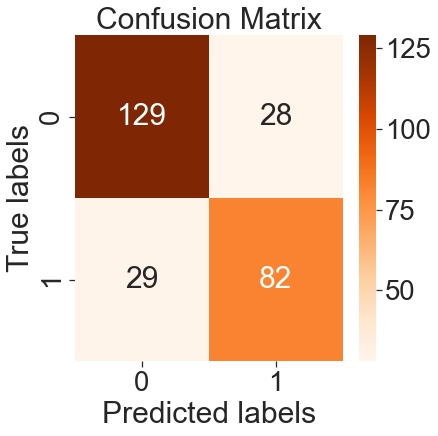

In [113]:
conf = confusion_matrix(y_validation,ypred)
conf
#plot the heatmap
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot()
sns.heatmap(conf, annot=True, ax = ax, fmt='g', cmap = 'Oranges')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')


Seems a balanced result

In [114]:
conf[1][1]

82

In [115]:
acc = (conf[0][0] + conf[1][1])/(conf[0][0] + conf[1][1] + conf[0][1] + conf[1][0])
acc

0.7873134328358209

## 7. Receiver Operator Curve and Area Under the Curve.

In [116]:
probs = m.predict_proba(X_validation) 
fpr, tpr, threshold = roc_curve(y_validation, probs[:,1])

Area under the curve =  0.8706030871635968


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


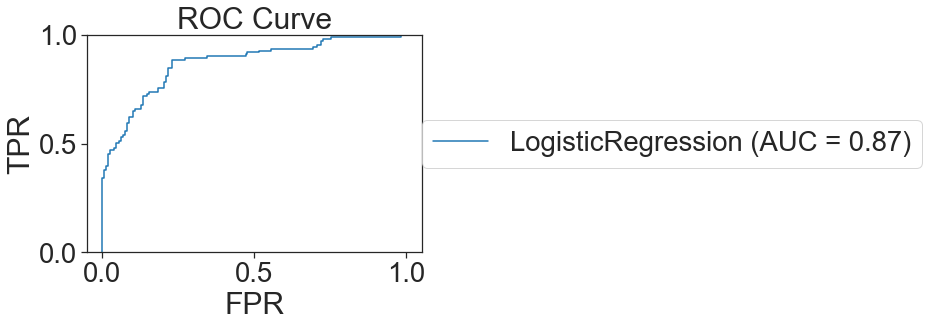

In [117]:
# Calculating area under the curve
auc_score = auc(fpr, tpr)
print("Area under the curve = ",auc_score)

plot_roc_curve(m, X_validation, y_validation)  
plt.title("ROC Curve")

plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend(loc="lower left")
plt.ylim([0,1.00])

plt.legend( loc='center left', bbox_to_anchor=(1, 0.5),borderaxespad=0)

## 8. Precision Recall Curve

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


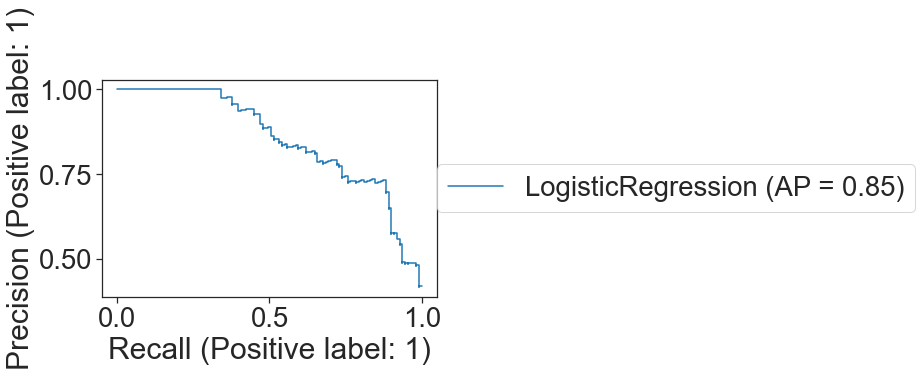

In [118]:
# plot precision and recall curve 
plot_precision_recall_curve(m, X_validation, y_validation)
precisions, recalls, thresholds = precision_recall_curve(y_validation, probs[:,1])

plt.legend( loc='center left', bbox_to_anchor=(1, 0.5),borderaxespad=0)

In [119]:
# compute area under precision recall curve 
pr_area = auc(recalls, precisions)
pr_area

0.8529973520893306

In [120]:
# compute area under precision recall curve 
pr_area = auc(recalls, precisions)
pr_area

0.8529973520893306

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  """


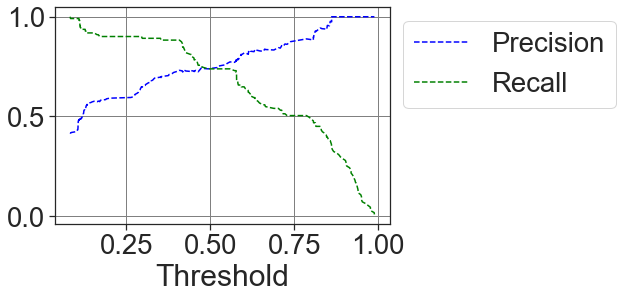

In [121]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.xlabel("Threshold")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)
plt.show()